In [1]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Understanding Cleint Data.
data=pd.read_csv("pima-indians-diabetes.csv")
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
#checking null values in dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# checking discriptive stats for above data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
# checking dependent features
data["Outcome"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

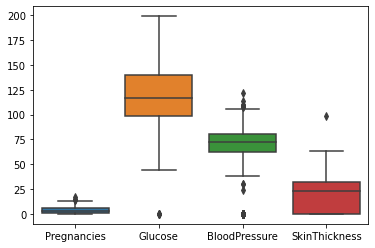

In [7]:
#checking data disrtibuted and range
sns.boxplot(data=data.iloc[:,:4])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

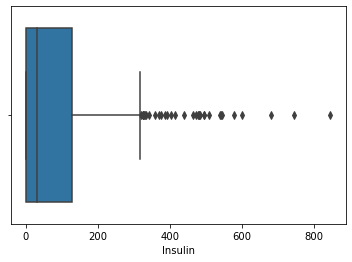

In [8]:
sns.boxplot(data["Insulin"])

<AxesSubplot:>

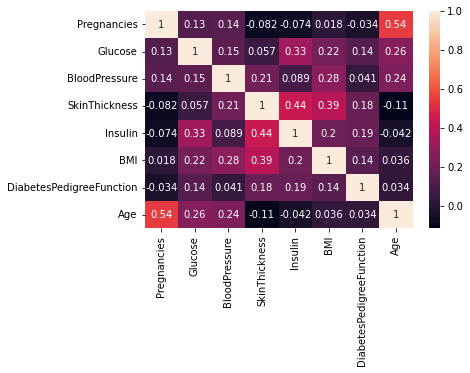

In [9]:
#checking correlation in independent features
sns.heatmap(data.iloc[:,:-1].corr(),annot=True)

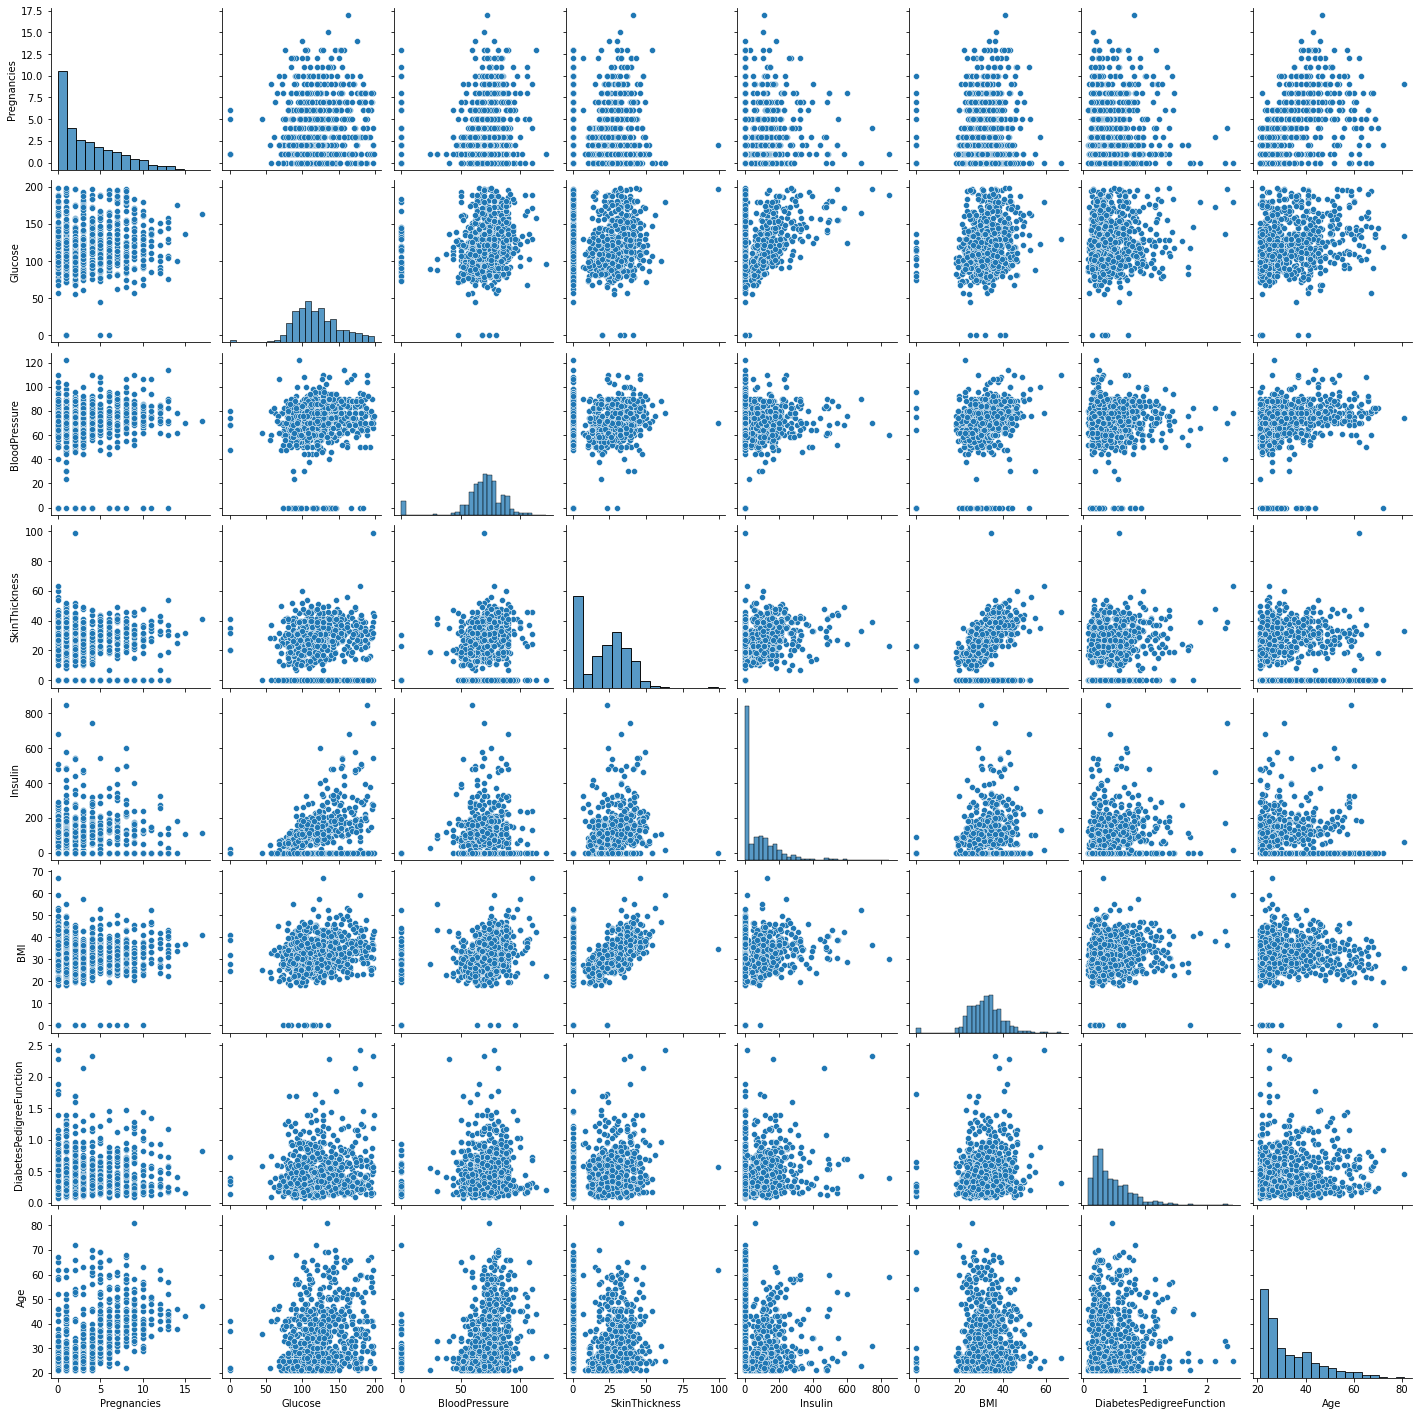

In [10]:
sns.pairplot(data.iloc[:,:-1])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure'>

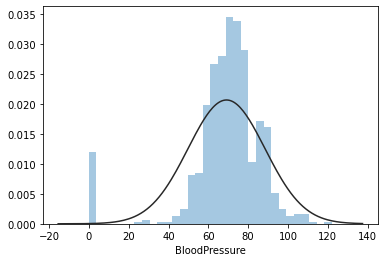

In [11]:
from scipy.stats import norm
sns.distplot(data["BloodPressure"],fit=norm, kde = False) # for fit (prm) -

<AxesSubplot:xlabel='Outcome', ylabel='count'>

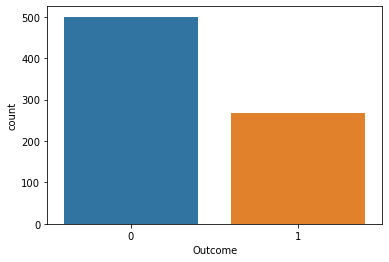

In [12]:
sns.countplot(x=data["Outcome"])

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

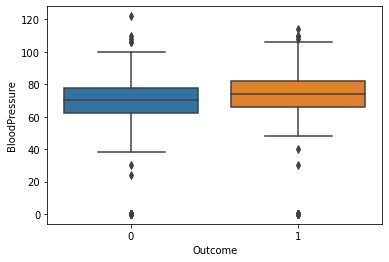

In [13]:
#checking the difference of blood pressor for  diabetic and Non-diabetic patients
sns.boxplot(x=data["Outcome"],y=data["BloodPressure"])

In [14]:
X = data.iloc[:,:-1] # Features
y = data.Outcome # Target variable
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(576, 8)
(192, 8)


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)  # max_iter is hyperparmeter (optimizer)
# fit the model with data
logreg.fit(X_train,y_train)        # learning of our ml model
y_pred=logreg.predict(X_test)
y_pred                # prdiction on unkwon data (X_test data)  # result of classification

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [17]:
(117+36)/(117+36+13+26)

0.796875

In [18]:
logreg.score(X_test,y_test)  # score on test data

0.796875

In [19]:
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.58      0.65        62
           0       0.82      0.90      0.86       130

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [20]:
print(X_test.shape)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_pred_proba

(192, 8)


array([0.95647295, 0.165577  , 0.08712582, 0.63611023, 0.11441523,
       0.03750142, 0.74096543, 0.85378405, 0.37616507, 0.38859407,
       0.57911932, 0.960618  , 0.27985155, 0.16372591, 0.12212607,
       0.15487425, 0.85953779, 0.02451069, 0.44135394, 0.24446024,
       0.66074789, 0.40240842, 0.18725478, 0.06895092, 0.04986428,
       0.34665722, 0.04318042, 0.9078646 , 0.10696928, 0.1328587 ,
       0.46578469, 0.25362943, 0.09712433, 0.45400324, 0.09395705,
       0.69343762, 0.46201079, 0.08637596, 0.32782115, 0.72994255,
       0.27418888, 0.20761714, 0.15232948, 0.8172274 , 0.77739254,
       0.00836955, 0.08331135, 0.20064983, 0.35253077, 0.28571142,
       0.37766907, 0.18049047, 0.87657445, 0.50005146, 0.14543658,
       0.00264118, 0.06130204, 0.55245604, 0.25692768, 0.05561366,
       0.75019328, 0.47757015, 0.10037117, 0.66582658, 0.66508482,
       0.89172083, 0.70779897, 0.13769362, 0.33400525, 0.11010581,
       0.11497749, 0.34830408, 0.09973418, 0.94831244, 0.83527

In [21]:
y_test=1 <= y_test

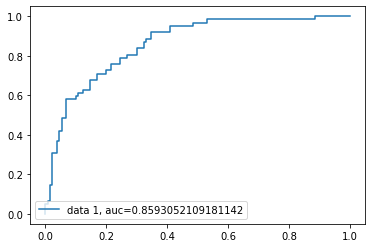

In [22]:
y_test=1 <= y_test  # coverting y_test variable into (ture/fasle values)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba) 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=3)
plt.show()